In [32]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [33]:
#set sampling rate, length of time, sampling frequency, sample number
sampling_rate = 440 #in Hz 
time_length = 2 #  second
dt = 1/sampling_rate # sampling frequency
N = int(sampling_rate*time_length) # sample number

In [34]:
x0= 0 + 0j
f0= 440
ff= N #周波数をN回シフトさせる。n回目のシフト量は、dt*n*π*/2 これにラグがかかる
t = np.arange(0, time_length, dt)

mat = np.zeros((ff,len(t)*2-1), dtype=complex) #ここに（周波数シフト、ラグ）のマトリックスを格納する

#その他配列の宣言
que= np.zeros((len(t)), dtype=complex)
y0 = np.zeros((len(t)), dtype=complex)
y1 = np.zeros((len(t)), dtype=complex)
Amp = np.zeros((ff,len(t)), dtype=float)
print(len(t))

880


In [35]:
print(mat.dtype)
for i in range(ff):
    y0 = np.exp(2j*np.pi*f0*t)
    # y1 = np.exp((2j*np.pi*f0*t)-i*np.pi*dt*1j*t)
    y1 = y0 *np.exp(-i*np.pi*dt*t*1j)
    que0 = correlate(y0, y1, mode='full') # Fullモードはラグを倍計算する。440　x２
    mat[i,:]= que0[:]
print(i)


complex128
879


(880, 1759)


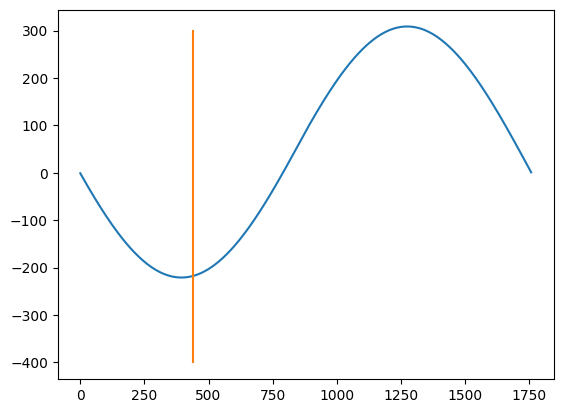

In [42]:
#試しに200Hzずれたところの、横軸ラグ、縦軸相互相関を書いてみる。
print(mat.shape)
plt.plot(mat[200,:])
xx=[440,440]
yy=[-400,300]
plt.plot(xx,yy)
plt.show()


(880, 1759)


/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


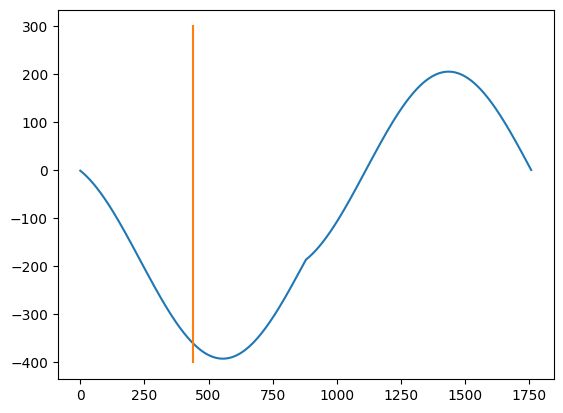

In [41]:
#試しに300Hzずれたところの、横軸ラグ、縦軸相互相関を書いてみる。ピークがずれている。
print(mat.shape)
plt.plot(mat[300,:])
xx=[440,440]
yy=[-400,300]
plt.plot(xx,yy)
plt.show()

/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0, 0.5, 'df')

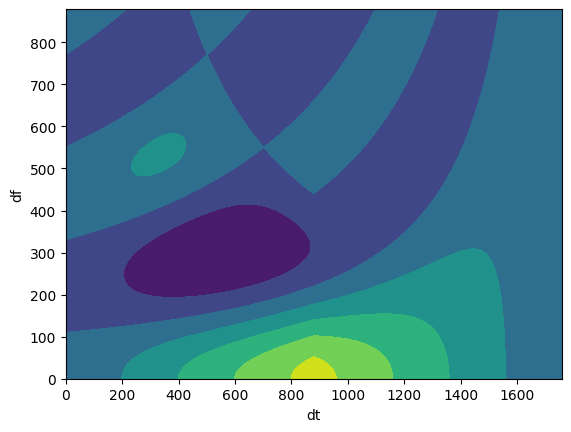

In [40]:
plt.contourf(((mat)))
plt.xlabel("dt")
plt.ylabel("df")
